### DECISION TREE

- Basic idea behind building a decision tree is to map all possible decisions and their possible consequences in a tree-like structure.
- Efficient ML model for both classification and regression tasks.
- A decision tree is built by splitting the dataset into subsets based on the value of input features.
- Each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents  an      outcome (or class label).
- Data driven programming the conditions.

### Decision Tress important terminologies:
1. Root Node: The topmost node in a decision tree that represents the entire dataset.
2. leaf Node: A terminal node that represents a class label (outcome) in classification tasks or a continuous value in regression tasks.
3. Internal Node: A node that splits the data based on a feature and contains branches to child nodes.
4. Branch: A connection between nodes that represents a decision rule based on a feature value
5. Splitting: The process of dividing a node into two or more child nodes based on a feature.
6. Pruning: The process of removing unnecessary branches from the tree to prevent overfitting and improve generalization.

### Case Study: Drug Prediction
- Predicting whether a patient should be prescribed a specific drug based on their medical history and symptoms.

- Features
    - Age
    - Gender
    - Blood Pressure
    - Cholesterol Level
    - Symptoms (e.g., headache, nausea)

- Target Variable
    - Drug Type (e.g., Drug A, Drug B)

- Steps to build a Decision Tree Classifier:
1. Data Collection: Gather a dataset containing patient information and the corresponding drug prescribed.
2. Data Preprocessing: Clean the data, handle missing values, and encode categorical variables if necessary.
3. Feature Selection: Identify the most relevant features that contribute to drug prediction.
4. Split the Data: Divide the dataset into training and testing sets.
5. Train the Model: Use the training data to build the decision tree classifier.
6. Evaluate the Model: Assess the model's performance using the testing data and metrics such as accuracy, precision, recall, and F1-score.

Intuition of Node Impurity 
- Method uses recursive partitioning to minimize impurity at each node.
- low impurity indicates that the data points in a node are more homogeneous, while high impurity indicates greater diversity
- Entropy and Gini Impurity are commonly used measures of node impurity.

what is Entropy?
- Entropy is a measure of uncertainty or randomness in a dataset.
- lower entropy, higher the purity of the node and less uncertainty about the class labels of the data points within that node.

What is Gini Index?
- Gini Index is a measure of statistical dispersion that represents the inequality among values of a frequency distribution.
- lower the Gini Index, higher the purity of the node.
- Higher Gini Index indicates more diversity in the class labels of the data points within that node.

Information Gain
- is the information that can increase the level of certainty about a random variable after observing another random variable.
- Information Gain is calculated as the difference between the entropy of the parent node and the weighted average entropy of the child nodes after a split.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [4]:
# Load the dataset
data = pd.read_csv('Renewable_Energy_Adoption.csv')
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [5]:
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['adoption']  # Target variable

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Initialize the model with a specified max depth to prevent overfitting
model = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


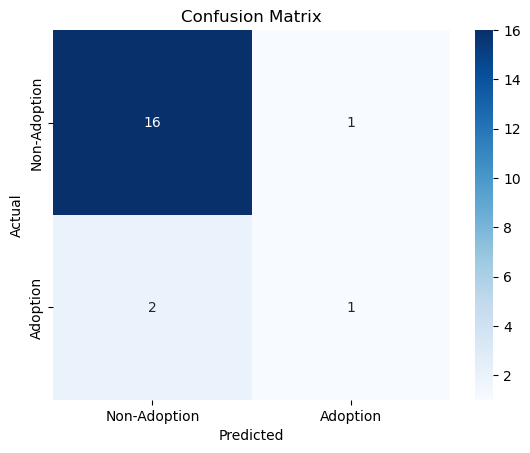

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Adoption', 'Adoption'], 
            yticklabels=['Non-Adoption', 'Adoption'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Non-Adoption', 'Adoption']))

              precision    recall  f1-score   support

Non-Adoption       1.00      1.00      1.00        17
    Adoption       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [13]:
import joblib
# Save the model to a file
joblib.dump(model, 'Renewable_Energy_Adoption_model.pkl')
print("Model retrained and saved successfully!")

Model retrained and saved successfully!


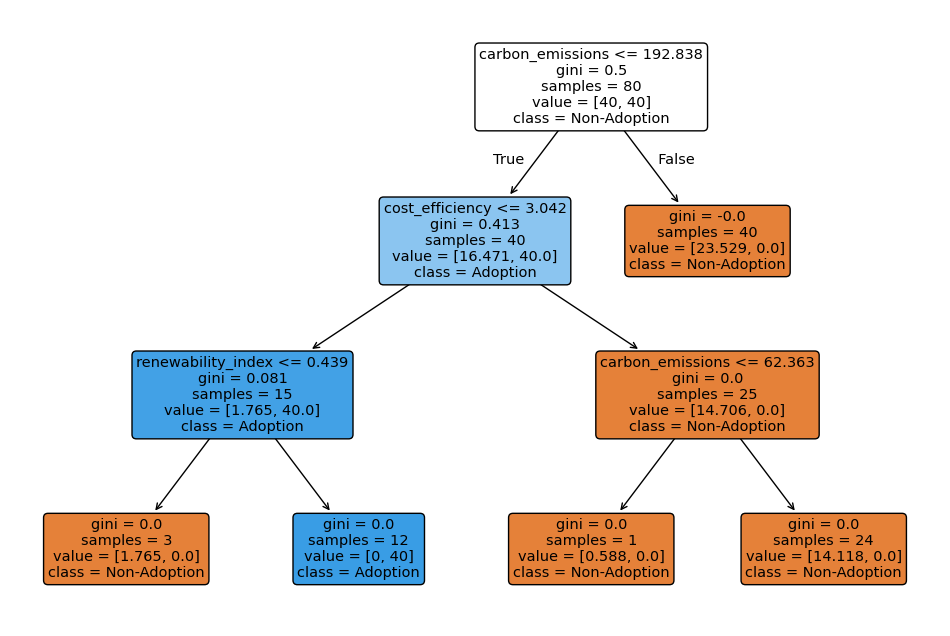

In [12]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Non-Adoption', 'Adoption'], filled=True, rounded=True)
plt.savefig('dt1.png')
plt.show()